## George Okoko goo2112  
## Assignment 4

## Problem 1: Line plots

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pooch
import pandas as pd

In [2]:
POOCH = pooch.create(
    path=pooch.os_cache("noaa-data"),
    # Use the figshare DOI
    base_url="doi:10.5281/zenodo.5553029/",
    registry={
        "HEADERS.txt": "md5:2a306ca225fe3ccb72a98953ded2f536",
        "CRND0103-2016-NY_Millbrook_3_W.txt": "md5:eb69811d14d0573ffa69f70dd9c768d9",
        "CRND0103-2017-NY_Millbrook_3_W.txt": "md5:b911da727ba1bdf26a34a775f25d1088",
        "CRND0103-2018-NY_Millbrook_3_W.txt": "md5:5b61bc687261596eba83801d7080dc56",
        "CRND0103-2019-NY_Millbrook_3_W.txt": "md5:9b814430612cd8a770b72020ca4f2b7d",
        "CRND0103-2020-NY_Millbrook_3_W.txt": "md5:cd8de6d5445024ce35fcaafa9b0e7b64"
    },
)

with open(POOCH.fetch("HEADERS.txt")) as fp:
    data = fp.read()
lines = data.split('\n')
headers = lines[1].split(' ')

dframes = []
for year in range(2016, 2019):
    fname = f'CRND0103-{year}-NY_Millbrook_3_W.txt'               
    df = pd.read_csv(POOCH.fetch(fname), parse_dates=[1],
                     names=headers, header=None, sep='\s+',
                     na_values=[-9999.0, -99.0])
    dframes.append(df)

df = pd.concat(dframes)
df = df.set_index('LST_DATE')
df
#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays)  
#### NO PANDAS ALLOWED!
#########################################################
t_daily_min = df.T_DAILY_MIN.values
t_daily_max = df.T_DAILY_MAX.values
t_daily_mean = df.T_DAILY_MEAN.values
p_daily_calc = df.P_DAILY_CALC.values
soil_moisture_5 = df.SOIL_MOISTURE_5_DAILY.values
soil_moisture_10 = df.SOIL_MOISTURE_10_DAILY.values
soil_moisture_20 = df.SOIL_MOISTURE_20_DAILY.values
soil_moisture_50 = df.SOIL_MOISTURE_50_DAILY.values
soil_moisture_100 = df.SOIL_MOISTURE_100_DAILY.values
date = df.index.values

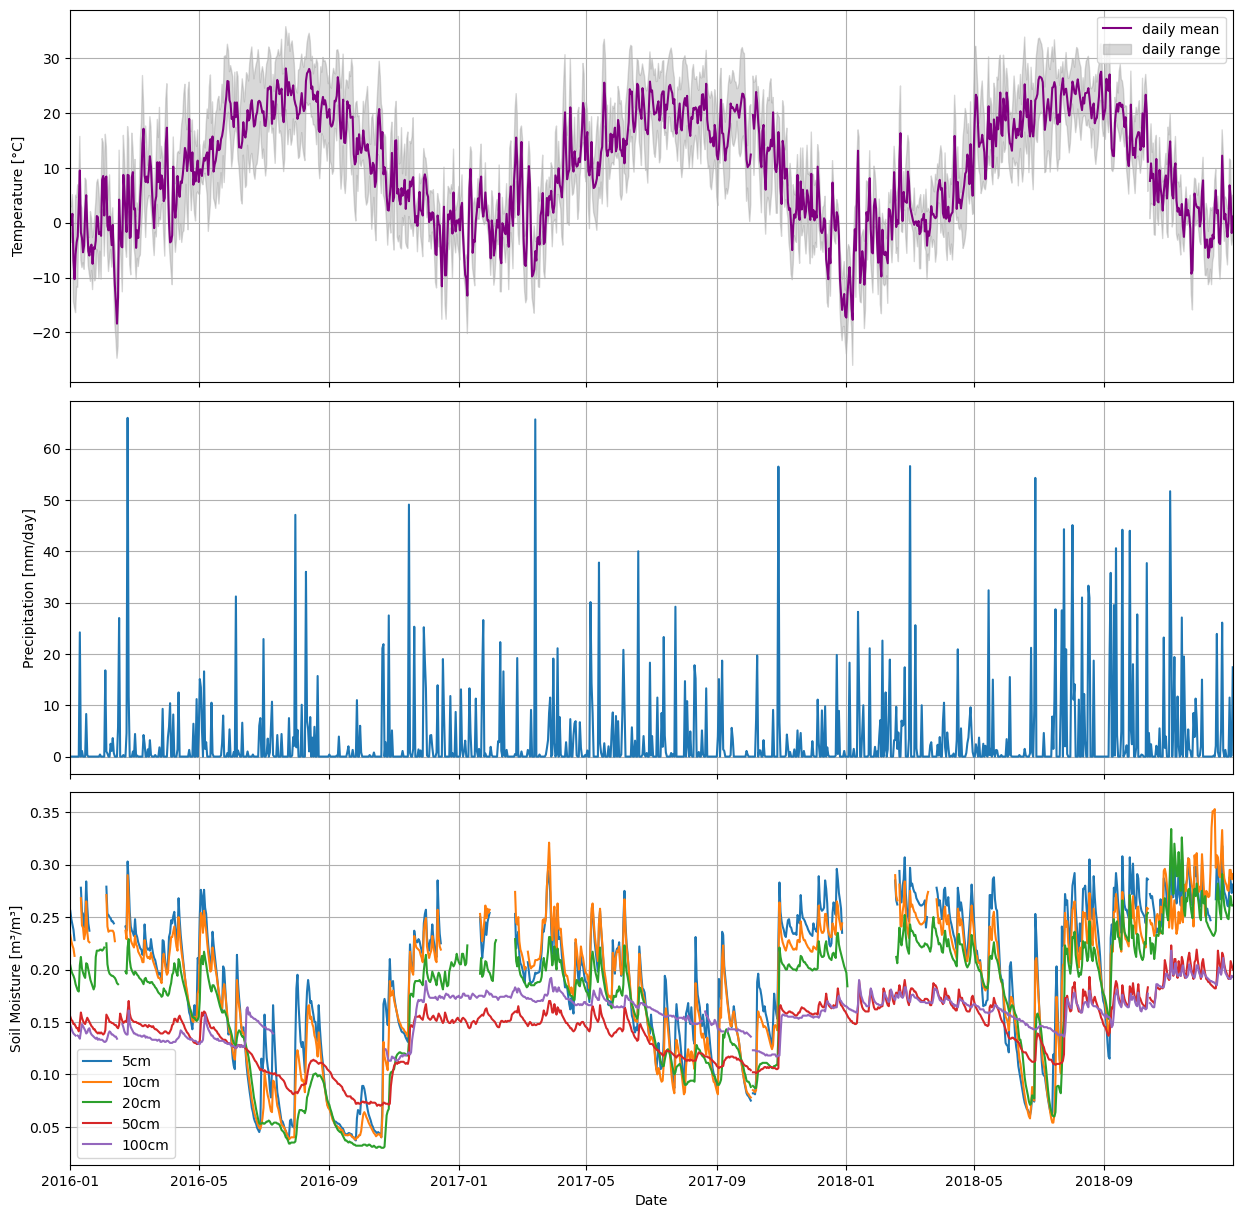

In [3]:
#Recreating the given plot
fig = plt.figure(figsize=(15, 15))
axes = fig.subplots(nrows=3, ncols=1)
axes[0].plot(date, t_daily_mean, color='purple', label='daily mean')
axes[0].fill_between(date, t_daily_min, t_daily_max, color='grey', alpha=0.3, label='daily range')
axes[1].plot(date, p_daily_calc, label='Precipitation')
axes[2].plot(date, soil_moisture_5, label='5cm')
axes[2].plot(date, soil_moisture_10, label='10cm')
axes[2].plot(date, soil_moisture_20, label='20cm')
axes[2].plot(date, soil_moisture_50, label='50cm')
axes[2].plot(date, soil_moisture_100, label='100cm')
axes[0].set_xticklabels([])
axes[1].set_xticklabels([])
axes[0].set_ylabel('Temperature [°C]')
axes[1].set_ylabel('Precipitation [mm/day]')
axes[2].set_ylabel('Soil Moisture [m³/m³]')
axes[2].set_xlabel('Date')
axes[0].legend(loc ='upper right')
axes[2].legend(loc ='lower left')
axes[0].grid(True)
axes[1].grid(True)
axes[2].grid(True)
x_min = min(date)
x_max = max(date)
axes[0].set_xlim(x_min, x_max)
axes[1].set_xlim(x_min, x_max)
axes[2].set_xlim(x_min, x_max)
plt.subplots_adjust(hspace=0.05)# adjust the vertical space between subplots.
plt.show()


## Problem 2: Contour Plots
Now we will visualize some global temperature data from the NCEP-NCAR atmospheric reanalysis.

In [4]:
ds_url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP-NCAR/.CDAS-1/.MONTHLY/.Diagnostic/.surface/.temp/dods'
ds = xr.open_dataset(ds_url, decode_times=False)

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays) 
#### NO XARRAY ALLOWED!
#########################################################

temp = ds.temp[-1].values - 273.15
lon = ds.X.values
lat = ds.Y.values

ERROR 1: PROJ: proj_create_from_database: Open of /opt/sw/anaconda3/2023.09/envs/pangeo23/share/proj failed


In [5]:
# Calculating zonal mean
zonal_mean_temps = []
unique_lats = np.unique(lat)
for lat_val in unique_lats:
    lat_idx = np.where(lat == lat_val)
    temp_lat = temp[lat_idx]
    lon_lat = lon[lat_idx]
    mean_temp= np.mean(temp_lat)
    zonal_mean_temps.append(mean_temp)

# Print zonal mean temperatures


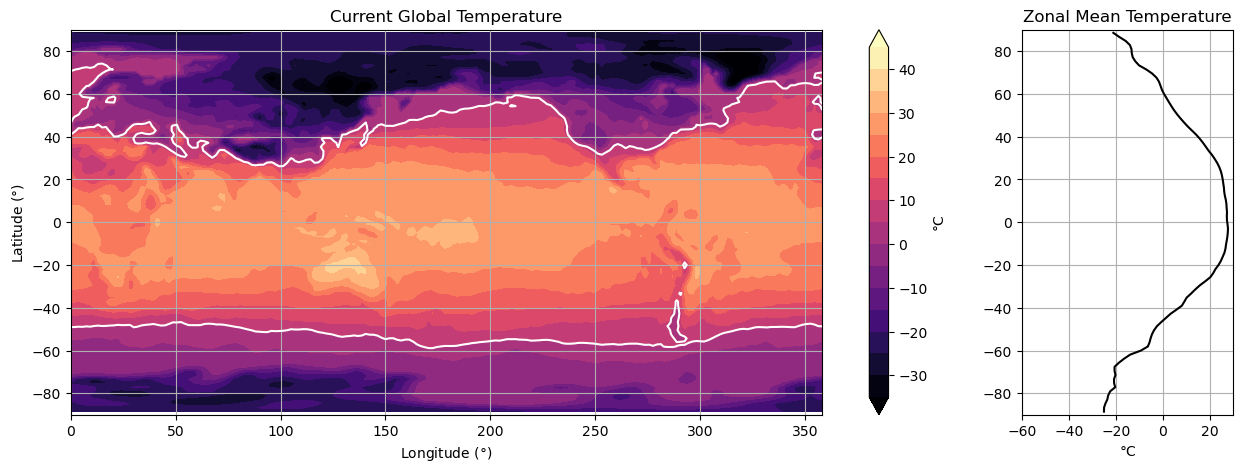

In [6]:
# Example data
temp = ds.temp[-1].values - 273.15  # Assuming ds.temp is a DataArray or similar object
lon = ds.X.values
lat = ds.Y.values
# Create meshgridnof lat and long
lon_grid, lat_grid = np.meshgrid(lon, lat)
temp_shape=temp.reshape((94,192))
fig, (axes[0],axes[1])=plt.subplots(1,2,figsize=(15,5),gridspec_kw={'width_ratios': [4, 0.9]})
cgt=axes[0].contourf(lon_grid,lat_grid,temp_shape,cmap='magma',
                 levels=[-35,-30,-25,-20,-15,-10,-5,0,5,10,15,20,25,30,35,40,45],
                 extend='both') #cgt = current global temperature plot on axes[0]
axes[0].contour(lon_grid,lat_grid, temp_shape,levels=[5], colors='white',linestyles='solid')
axes[0].set_ylim(-90, 90)
axes[1].set_ylim(-90, 90)
axes[1].set_xlim(-60, 30)
axes[0].grid(True)
axes[1].grid(True)
axes[0].set_xlabel('Longitude ($\xb0$)')
axes[1].set_xlabel('$\xb0$C')
axes[0].set_ylabel('Latitude ($\xb0$)')
axes[0].set_title('Current Global Temperature')
axes[1].set_title('Zonal Mean Temperature')
fig.colorbar(cgt, label='$\xb0$C')
axes[1].plot(zonal_mean_temps,lat, color='black')
plt.subplots_adjust(wspace=0.02)

## Problem 3: Scatter plots

Here we will make a map plot of earthquakes from a USGS catalog of historic large earthquakes. Color the earthquakes by log10(depth) and adjust the marker size to be magntiude^4
/100

In [7]:
fname = pooch.retrieve(
    "https://rabernat.github.io/research_computing/signif.txt.tsv.zip",
    known_hash='22b9f7045bf90fb99e14b95b24c81da3c52a0b4c79acf95d72fbe3a257001dbb',
    processor=pooch.Unzip()
)[0]
earthquakes = np.genfromtxt(fname, delimiter='\t')
depth = earthquakes[:, 8]
magnitude = earthquakes[:, 9]
latitude = earthquakes[:, 20]
longitude = earthquakes[:, 21]
print(magnitude)

[nan 7.3 7.1 ... 6.3 4.2 5. ]


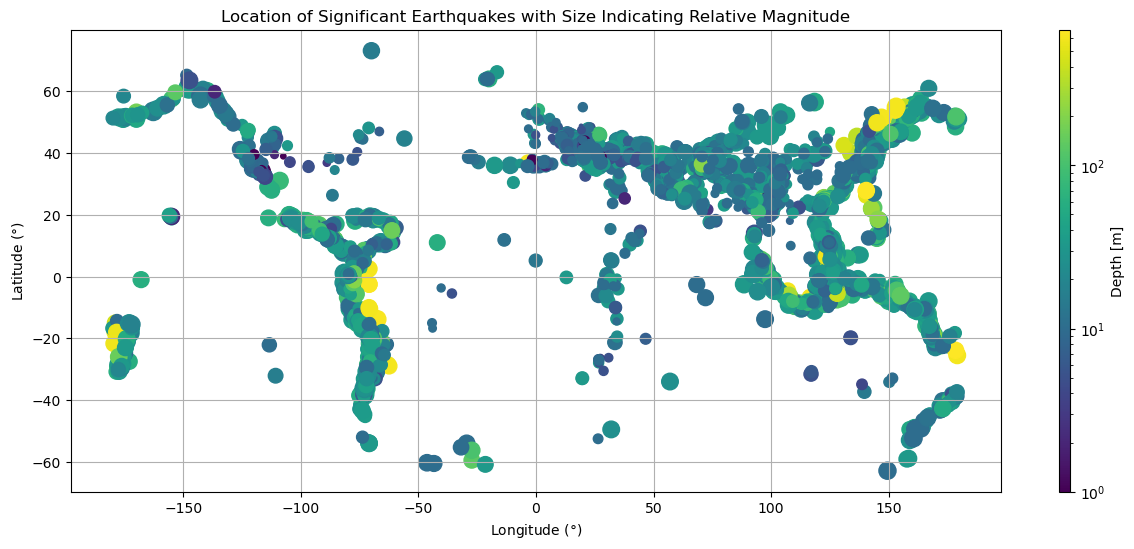

In [8]:
import matplotlib as mlp
fig, ax = plt.subplots(figsize = (15,6))
splot = ax.scatter(longitude,latitude, c=depth, s=magnitude**2.4, norm =mlp.colors.LogNorm())
plt.xlabel('Longitude ($\xb0$)')
plt.ylabel('Latitude ($\xb0$)')
plt.grid()
plt.title('Location of Significant Earthquakes with Size Indicating Relative Magnitude')
cbar = fig.colorbar(splot, aspect =40)
cbar.set_label('Depth [m]')
